#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! ðŸ˜€

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [4]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0     1     2     3     4     5     6     7     8     9     ...  1711  \
1x1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x5     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
28x24   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x25   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x26   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x27   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x28   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       1712  1713  1714  1715  1716  17

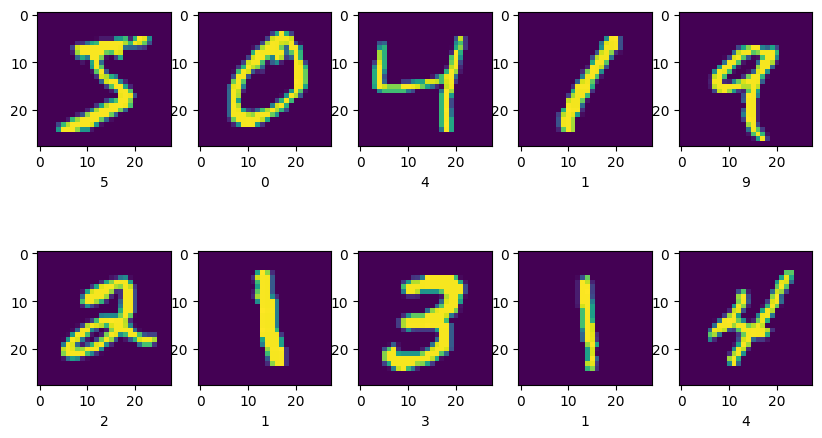

In [5]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [7]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    # Implement the RELU activation function
    return np.maximum(0, Z)

  def softmax(self, Z):
    # Implement the softmax activation function
    t = np.exp(Z)
    t = t / t.sum(axis=0, keepdims=True)
    return t

  def forward_propagation(self, X):
    # Implement the forward_propagation function
    pass

  def one_hot_encode(self, y):
    # Implement one hot encoding
    one_hot_y = np.zeros((y.max() + 1, y.size))
    one_hot_y[y, np.arange(y.size)] = 1
    return one_hot_y

  def total_loss(self, y_pred, Y):
    # Implement the total loss function
    m = Y.shape[1]
    loss = -np.sum(Y * np.log(y_pred)) / m
    return loss

  def backward_prop(self, y_pred, Y):
    #Implement the backward_prop function
    pass

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
       self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
       self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):

    #implement train
    for i in range(num_iterations):
      y_pred = self.forward_propagation(X)
      gradients = self.backward_prop(y_pred, y)
      self.update_params(gradients)
      if i % 100 == 0:
        loss = self.total_loss(y_pred, y)
        print(f"Iteration {i}: Loss = {loss}")

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions


In [ ]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration: 100, Loss: nan
Iteration: 200, Loss: nan
Iteration: 300, Loss: nan
Iteration: 400, Loss: nan
Iteration: 500, Loss: nan
Iteration: 600, Loss: nan
Iteration: 700, Loss: nan
Iteration: 800, Loss: nan
Iteration: 900, Loss: nan
Iteration: 1000, Loss: nan
Iteration: 1100, Loss: nan
Iteration: 1200, Loss: nan
Iteration: 1300, Loss: nan
Iteration: 1400, Loss: nan
Iteration: 1500, Loss: nan
Iteration: 1600, Loss: nan
Iteration: 1700, Loss: nan
Iteration: 1800, Loss: nan
Iteration: 1900, Loss: nan
Iteration: 2000, Loss: nan
Iteration: 2100, Loss: nan
Iteration: 2200, Loss: nan
Iteration: 2300, Loss: nan
Iteration: 2400, Loss: nan
Iteration: 2500, Loss: nan
Iteration: 2600, Loss: nan
Iteration: 2700, Loss: nan
Iteration: 2800, Loss: nan
Iteration: 2900, Loss: nan
Iteration: 3000, Loss: nan
Iteration: 3100, Loss: nan
Iteration: 3200, Loss: nan
Iteration: 3300, Loss: nan
Iteration: 3400, Loss: nan
Iteration: 3500, Loss: nan
Iteration: 3600, Loss: nan
Iteration: 3700, Loss: nan
Iteration:

In [ ]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 9.393414211438476 %


3


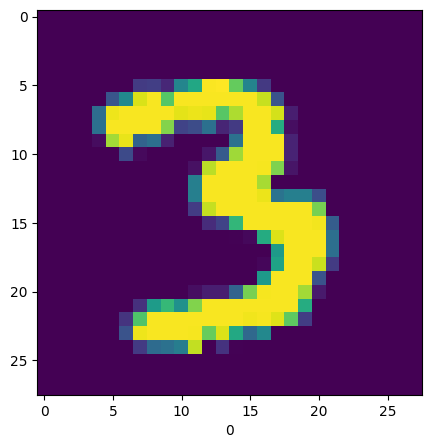

In [ ]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
